# Pitch Location Analysis for Shohei Ohtani in The 2023 Season

### *Data*
- We use the [pybaseball](https://github.com/jldbc/pybaseball) package to acquire baseball data. We're specifically using data from statcast through pybaseball. 
### *Packages*
- Polars, plotnine, and pybaseball. 
### *References*
- Refer to [this statcast website](https://baseballsavant.mlb.com/csv-docs) for details of the definition of each column.
### *Description of the viz*
- We create scatter plots showing pitch locations for the pitches thrown in the 2023 regular season by Shohei Ohtani. 
- We look at strkes/balls per pitch type and batter's stand.


## 0. Import packages

In [2]:
import polars as pl
from plotnine import *
from pybaseball import playerid_lookup, statcast_pitcher

## 1. Get player's id and pitching data

In [3]:
ohtani_id = playerid_lookup(first='shohei', last='ohtani').key_mlbam[0]

Gathering player lookup table. This may take a moment.


In [4]:
df = (
    pl.from_pandas(statcast_pitcher('2018-01-01', '2023-12-31', player_id=ohtani_id))
    .with_columns(
        pl.col('game_date').str.to_date(),
        pl.col('zone').cast(pl.Int16)
    )
)
df.head()

Gathering Player Data


pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,…,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
str,date,f64,f64,f64,str,i64,i64,str,str,f64,f64,f64,f64,i16,str,str,str,str,str,str,str,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,…,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64
"""FF""",2023-08-23,94.2,-1.98,5.78,"""Ohtani, Shohei""",687952,660271,null,"""foul""",null,null,null,null,5,"""Christian Encarnacion-Strand g…","""R""","""R""","""R""","""LAA""","""CIN""","""S""",null,null,2,2,2023,-0.61,1.05,-0.11,2.14,null,null,668715.0,1,2,"""Top""",…,6.8,716890,660271,681351,592273,650859,500871,623205,545341,666160,592669,53.65,null,null,null,null,null,null,null,11,5,"""4-Seam Fastball""",2,0,0,2,0,2,0,2,"""Standard""","""Standard""",204.0,0.0,0.0,null,null
"""ST""",2023-08-23,76.1,-2.01,5.74,"""Ohtani, Shohei""",687952,660271,null,"""swinging_strike""",null,null,null,null,14,"""Christian Encarnacion-Strand g…","""R""","""R""","""R""","""LAA""","""CIN""","""S""",null,null,2,1,2023,1.2,0.09,0.89,2.39,null,null,668715.0,1,2,"""Top""",…,6.5,716890,660271,681351,592273,650859,500871,623205,545341,666160,592669,54.01,null,null,null,null,null,null,null,11,4,"""Sweeper""",2,0,0,2,0,2,0,2,"""Standard""","""Standard""",65.0,0.0,-0.064,null,null
"""ST""",2023-08-23,77.2,-2.05,5.6,"""Ohtani, Shohei""",687952,660271,null,"""swinging_strike""",null,null,null,null,6,"""Christian Encarnacion-Strand g…","""R""","""R""","""R""","""LAA""","""CIN""","""S""",null,null,2,0,2023,0.75,0.55,0.8,2.11,null,null,668715.0,1,2,"""Top""",…,6.7,716890,660271,681351,592273,650859,500871,623205,545341,666160,592669,53.82,null,null,null,null,null,null,null,11,3,"""Sweeper""",2,0,0,2,0,2,0,2,"""Standard""","""Standard""",69.0,0.0,-0.072,null,null
"""FS""",2023-08-23,90.1,-1.94,5.69,"""Ohtani, Shohei""",687952,660271,null,"""ball""",null,null,null,null,14,"""Christian Encarnacion-Strand g…","""R""","""R""","""R""","""LAA""","""CIN""","""B""",null,null,1,0,2023,-1.41,0.58,0.59,1.01,null,null,668715.0,1,2,"""Top""",…,6.9,716890,660271,681351,592273,650859,500871,623205,545341,666160,592669,53.64,null,null,null,null,null,null,null,11,2,"""Split-Finger""",2,0,0,2,0,2,0,2,"""Standard""","""Standard""",317.0,0.0,0.063,null,null
"""FS""",2023-08-23,90.0,-1.83,5.76,"""Ohtani, Shohei""",687952,660271,null,"""blocked_ball""",null,null,null,null,14,"""Christian Encarnacion-Strand g…","""R""","""R""","""R""","""LAA""","""CIN""","""B""",null,null,0,0,2023,-1.36,0.72,1.29,0.18,null,null,668715.0,1,2,"""Top""",…,7.0,716890,660271,681351,592273,650859,500871,623205,545341,666160,592669,53.52,null,null,null,null,null,null,null,11,1,"""Split-Finger""",2,0,0,2,0,2,0,2,"""Standard""","""Standard""",191.0,0.0,0.042,null,null


## 2. Prep and transform the data for plotting

Inspecting min and max for pitch location related columns

In [6]:
(
    df
    .filter(
        pl.col('game_type')=='R'
    )
    .select(
        min=pl.col('game_date').min(),
        max=pl.col('game_date').max(),
        plate_x_min=pl.col('plate_x').min(),
        plate_x_max=pl.col('plate_x').max(),
        plate_z_min=pl.col('plate_z').min(),
        plate_z_max=pl.col('plate_z').max(),
        sz_bottom_min=pl.col('sz_bot').min(),
        sz_bottom_max=pl.col('sz_bot').max(),
        sz_top_min=pl.col('sz_top').min(),
        sz_top_max=pl.col('sz_top').max()
    )

)

min,max,plate_x_min,plate_x_max,plate_z_min,plate_z_max,sz_bottom_min,sz_bottom_max,sz_top_min,sz_top_max
date,date,f64,f64,f64,f64,f64,f64,f64,f64
2018-04-01,2023-08-23,-4.73,3.92,-1.77,6.41,1.05,1.94,2.64,4.03


Filtering data only for 2023 regular season. Adding a column to define a pitch as strike or ball.

In [7]:
season_2023 = (
    df
    .filter(
        pl.col('game_year')==2023,
        pl.col('game_type')=='R'
    )
    .with_columns(
        umpire_call=pl.when(pl.col('zone')<=9).then(pl.lit('Strike')).otherwise(pl.lit('Ball'))
    )
)

## 3. Plotting the pitches thrown in the 2023 season by Shohei Ohtani

Defining a geom for the strike zone as well as defining the overall pitch zone.

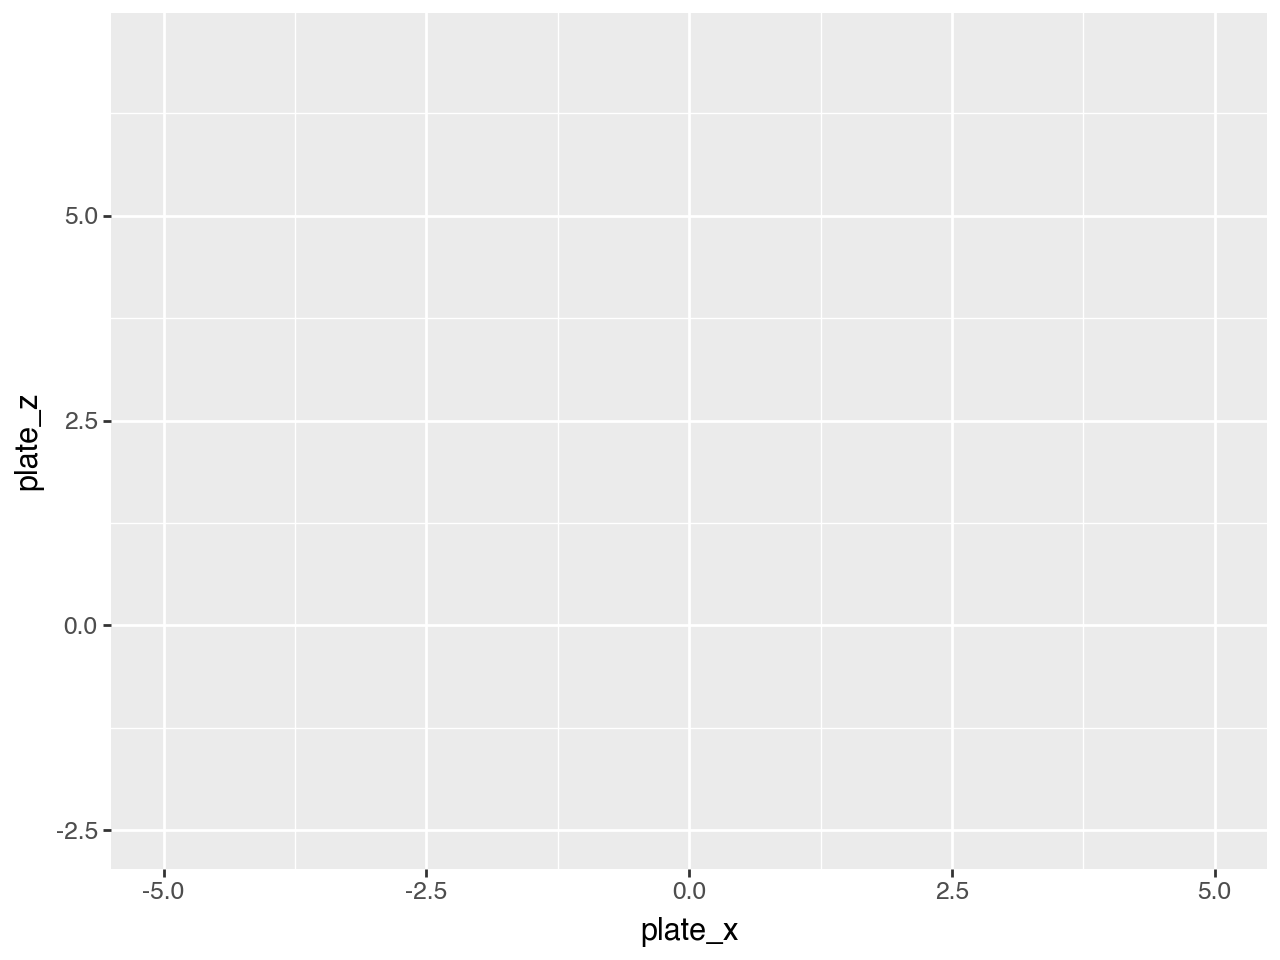

In [13]:
strike_zone = (
    geom_rect(
        ymax = 3.5, ymin = 1.5, 
        xmax = -0.8, xmin = 0.8, 
        alpha = 0, size=1,
        colour = 'black'
    )
)

pitch_zone_plot = (
    ggplot(season_2023, aes(x='plate_x', y='plate_z'))
    + coord_cartesian(
        xlim = [-5, 5],
        ylim = [-2.5, 7]
    )
)
pitch_zone_plot

Visualizing the pitches. Green is a strike, light gray is a ball. 

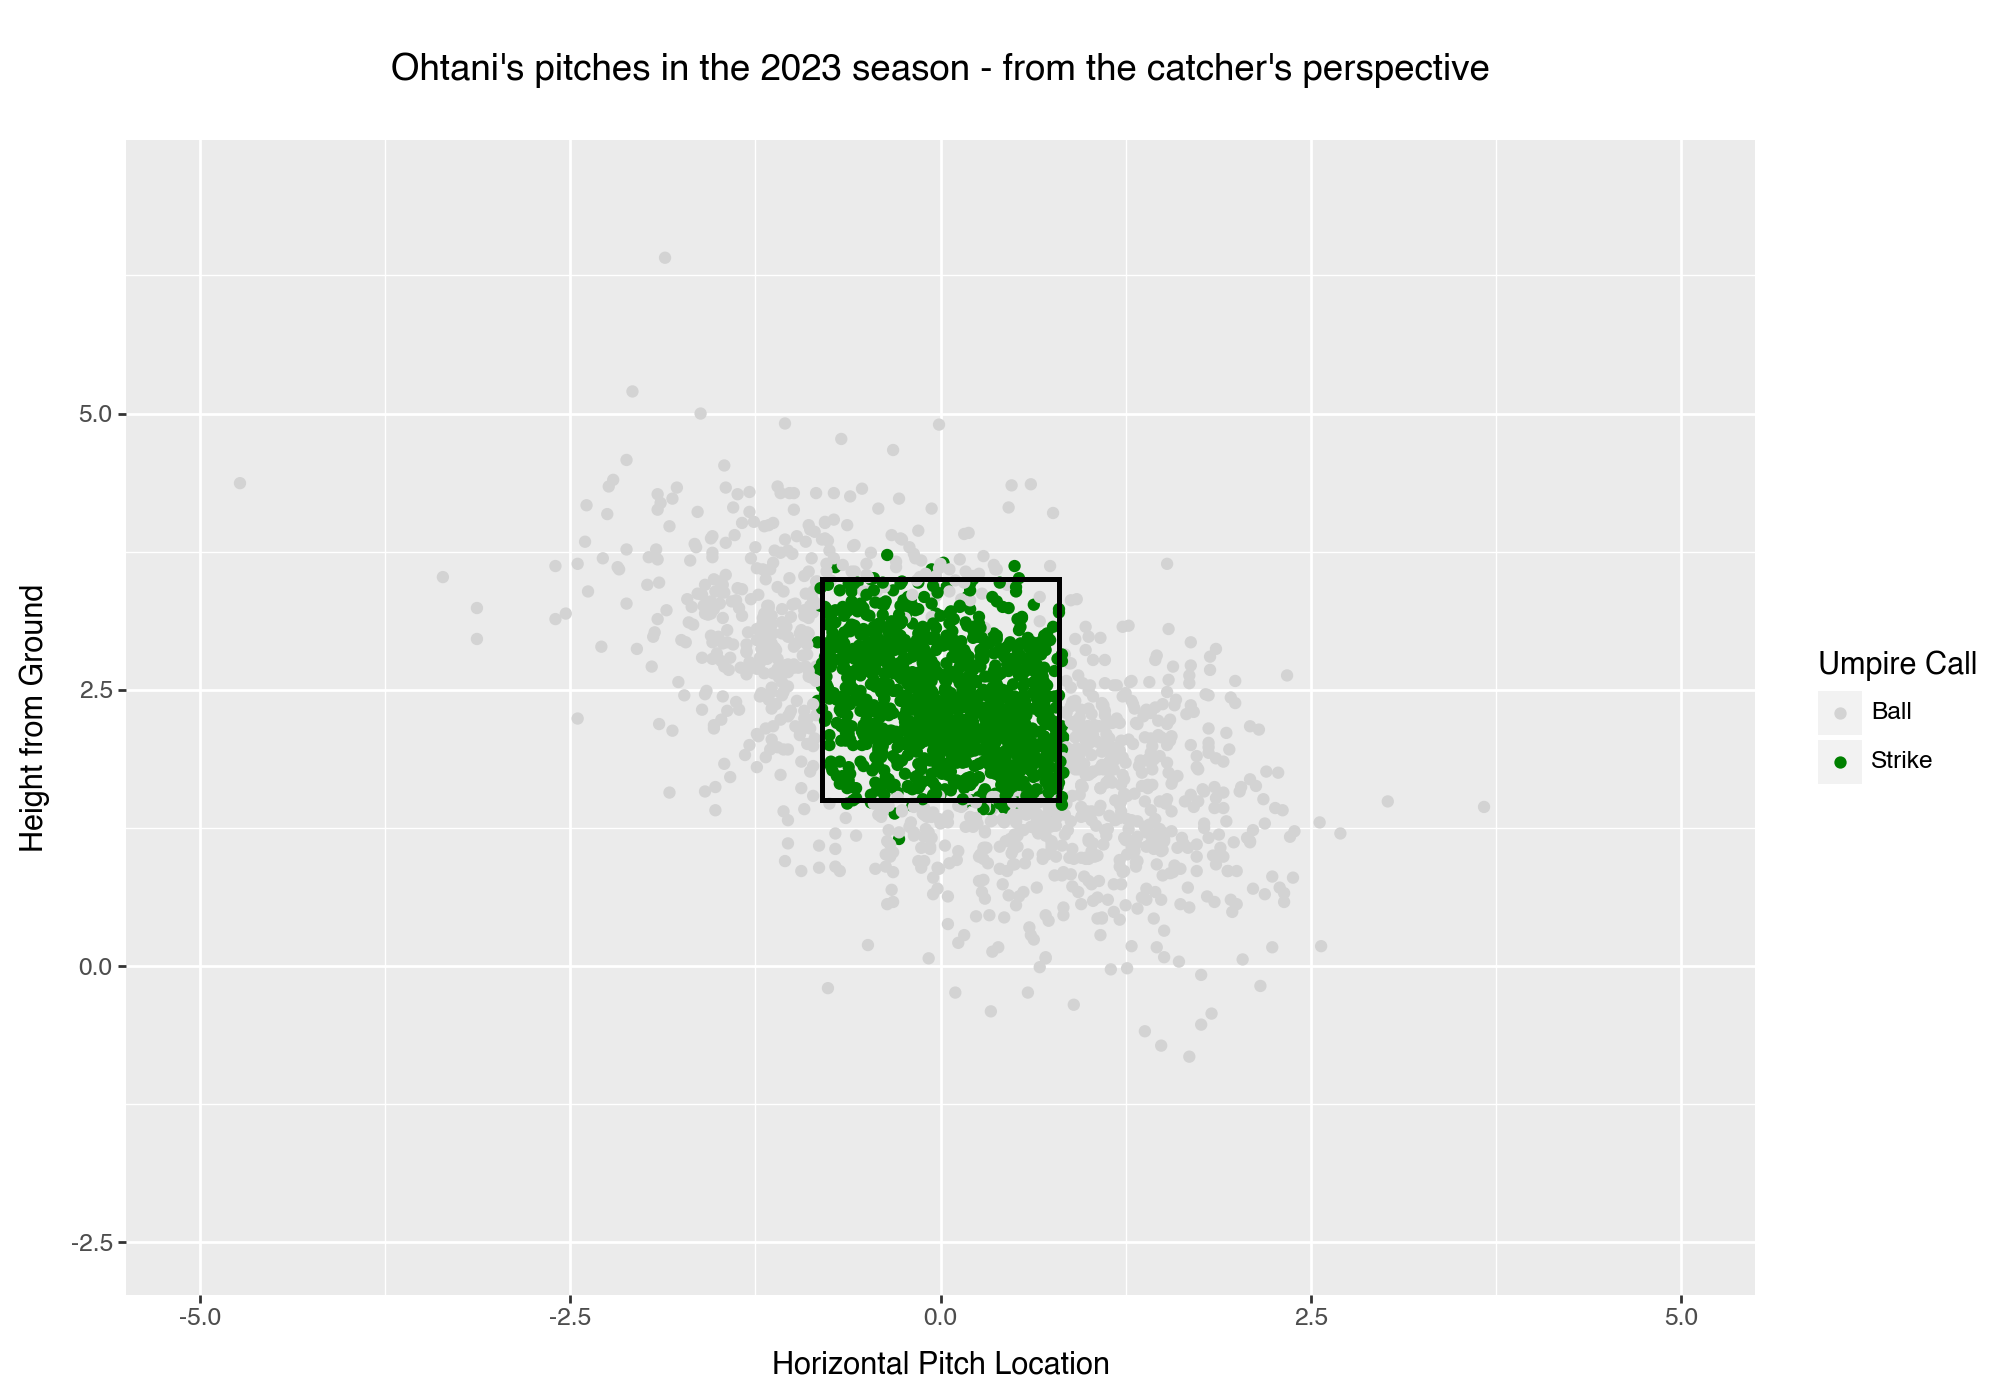

In [14]:
(
    pitch_zone_plot
    + geom_point(aes(color='umpire_call'))
    + scale_color_manual(values=['lightgray', 'green'])
    + strike_zone
    + labs(
        title='\nOhtani\'s pitches in the 2023 season - from the catcher\'s perspective\n',
        x='Horizontal Pitch Location', 
        y='Height from Ground',
        color='Umpire Call'
    )
    + theme(figure_size=(10,7))
)

Visualizing pitches per pitch type and batter's stand. 

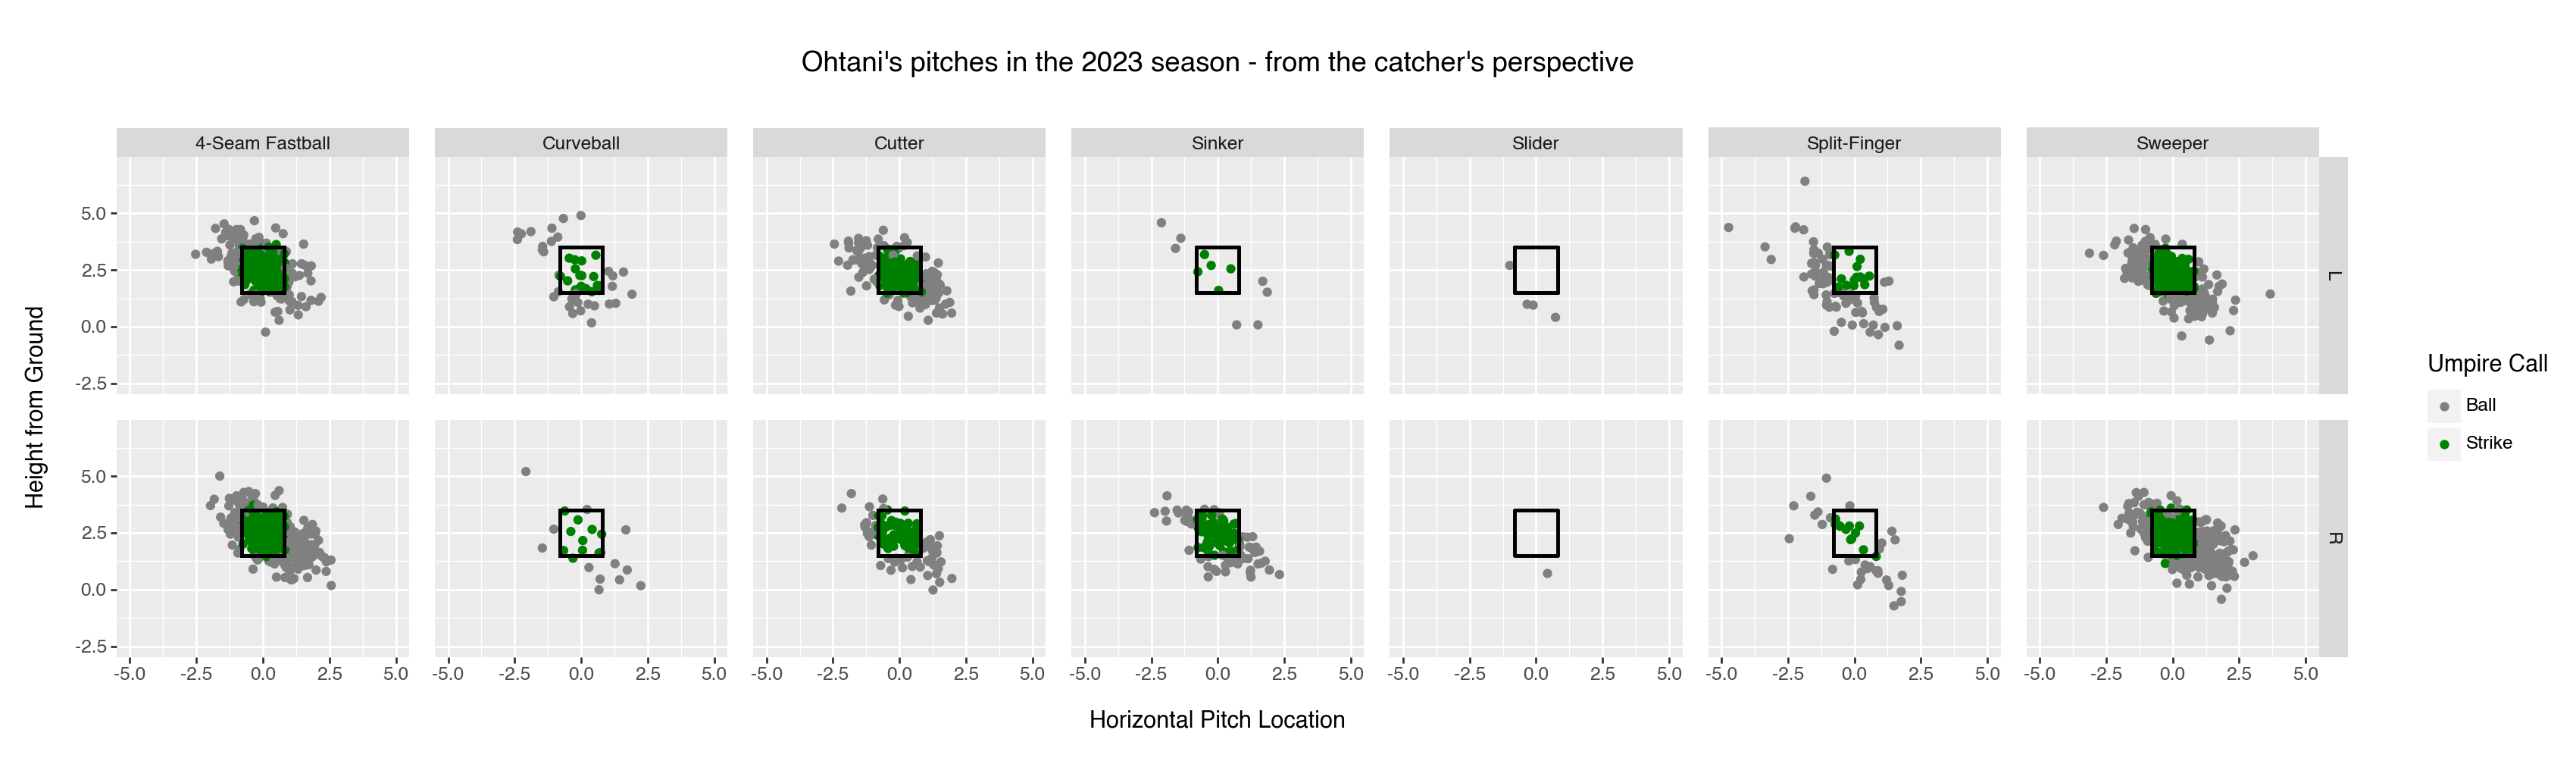

In [15]:
(
    pitch_zone_plot
    + geom_point(aes(color='umpire_call'))
    + scale_color_manual(values=['gray', 'green'])
    + facet_grid(rows='stand', cols='pitch_name')
    + strike_zone
    + labs(
        title='\nOhtani\'s pitches in the 2023 season - from the catcher\'s perspective\n',
        x='Horizontal Pitch Location', 
        y='Height from Ground',
        color='Umpire Call'
    )
    + theme(figure_size=(17, 5))
)